In [1]:
import pandas as pd
df = pd.read_csv('outputs/data_science_jobs.csv')

In [2]:
df.head()

,Unnamed: 0,Job Title,Company Name,Job Description,Location,Job Board
0,0,Data Scientist,Metricsflow Inc,"At Metricsflow, we work to shape the future of...",St. John's,Glassdoor
1,1,Data Scientist - 05/12/21,Acerta Analytics Solutions Inc,Acerta’s machine learning platforms leverage a...,Kitchener,Indeed
2,2,Data Engineer,GoodLife Fitness\n,Position Description\n\n\n\n\nDATA ENGINEER\n*...,Midtown Toronto,Glassdoor
3,3,Safety Aggregate Reporting & Analytics Coordin...,IQVIA,Job Overview\nManage the administrative suppor...,Kirkland,Indeed
4,4,Senior Data Engineer,Samsung Electronics\n,Position Summary\n\nThe SmartThings Big Data t...,Vancouver,Glassdoor


In [3]:
df = df.drop(df.columns[0], axis = 1) 

In [4]:
df.head()

,Job Title,Company Name,Job Description,Location,Job Board
0,Data Scientist,Metricsflow Inc,"At Metricsflow, we work to shape the future of...",St. John's,Glassdoor
1,Data Scientist - 05/12/21,Acerta Analytics Solutions Inc,Acerta’s machine learning platforms leverage a...,Kitchener,Indeed
2,Data Engineer,GoodLife Fitness\n,Position Description\n\n\n\n\nDATA ENGINEER\n*...,Midtown Toronto,Glassdoor
3,Safety Aggregate Reporting & Analytics Coordin...,IQVIA,Job Overview\nManage the administrative suppor...,Kirkland,Indeed
4,Senior Data Engineer,Samsung Electronics\n,Position Summary\n\nThe SmartThings Big Data t...,Vancouver,Glassdoor


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 881 entries, 0 to 880
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Job Title        881 non-null    object
 1   Company Name     881 non-null    object
 2   Job Description  881 non-null    object
 3   Location         881 non-null    object
 4   Job Board        881 non-null    object
dtypes: object(5)
memory usage: 34.5+ KB


<AxesSubplot:xlabel='Job Board', ylabel='Counts'>

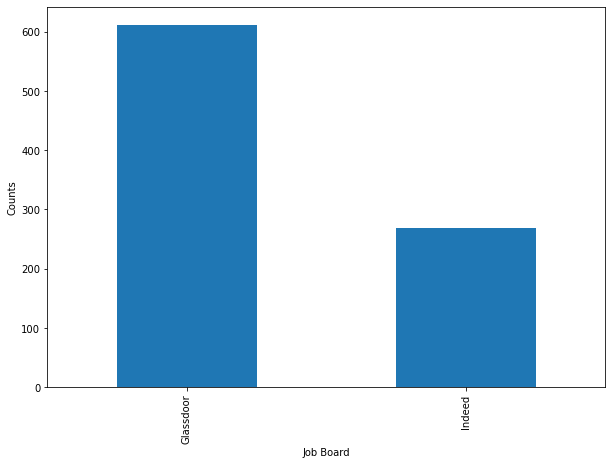

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))

plt.xlabel("Job Board")
plt.ylabel("Counts")

df["Job Board"].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='Location', ylabel='Counts'>

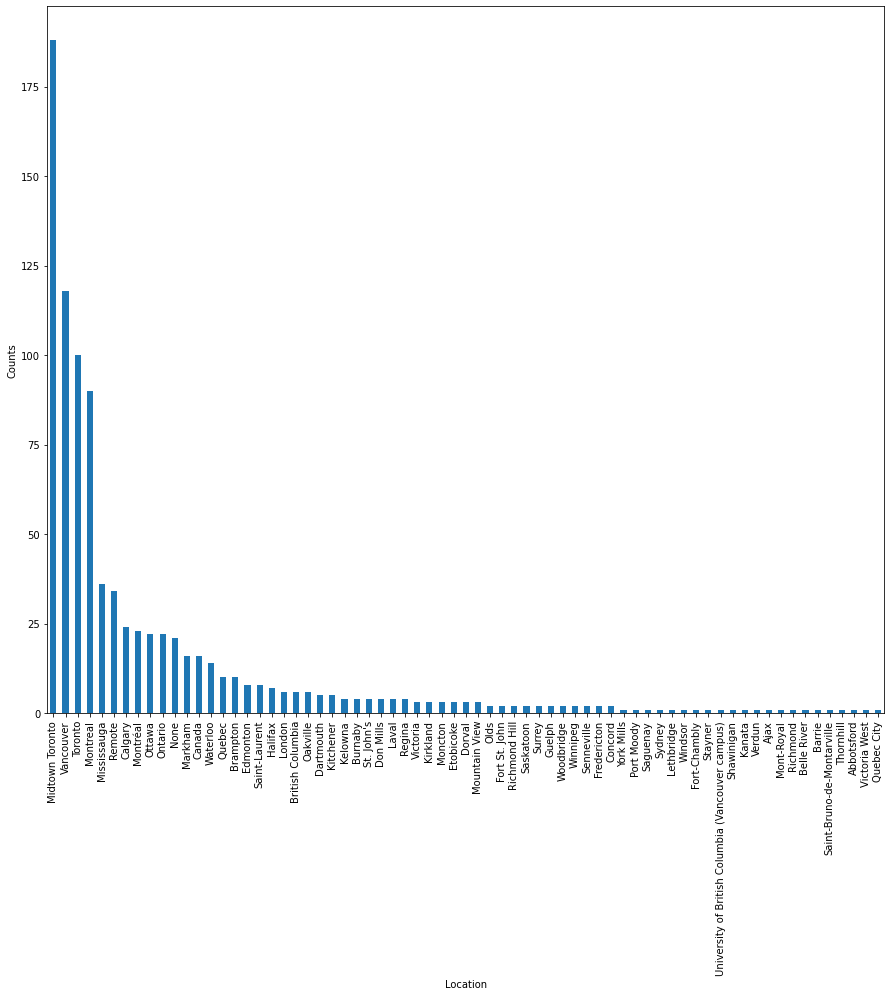

In [7]:
plt.figure(figsize=(15,13))

plt.xlabel("Location")
plt.ylabel("Counts")
df["Location"].value_counts().plot(kind='bar')

### Most Frequent Job Titles

In [8]:
df['Job Title'].value_counts()[:10].index.tolist()


['Data Scientist',
 'Data Engineer',
 'Senior Data Scientist',
 'Senior Data Analyst',
 'Data Analyst',
 'Machine Learning Engineer',
 'Lead Data Scientist',
 'Senior Data Engineer',
 'Big Data Engineer',
 'Sr. Data Analyst']

### Least Frequent Job Titles

In [9]:
df['Job Title'].value_counts()[-10:].index.tolist()


['Market Data Engineer',
 'Intermediate Project Scientist / Intermediate Project Technician',
 'Air Quality Engineer or Scientist',
 'Business Intelligence, Data Engineer - remote - Victoria',
 'Data Scientist, Omnia AI',
 'Intermediate Engineer/Scientist – Quality Assurance Operations (Software)',
 'Digital Data Engineer',
 'Senior Java/Data Engineer (VP)',
 'Junior GCP Data Engineer - Mississauga',
 'Senior Data Scientist, AWS Security- Ottawa/Toronto']

In [10]:
#check for null values
df.isnull().sum()

Job Title          0
Company Name       0
Job Description    0
Location           0
Job Board          0
dtype: int64

In [11]:
#drop null values
#df = df.dropna(subset = ['Job Description'])
#df.isnull().sum()

In [12]:
#Extract titles for analysis
job_title_df = df['Job Title'].to_frame()
job_title_df.sample(10, random_state = 5)

,Job Title
852,HEAD OF ANALYTICS & INSIGHTS/DATA SCIENTIST
207,Machine Learning Engineer
627,"Data Engineer / Power BI Developer, Omnia AI"
671,Junior Business Intelligence Developer - Data ...
661,"Data Scientist Technical Lead (Montreal), Inta..."
489,Bio informaticien/Bioinformatics scientist
434,Data Scientist
448,Scientifique de données / Data Scientist
634,Data Management Specialist - Immunotoxicology
748,Data Scientist


<AxesSubplot:xlabel='Job Title length', ylabel='No. of jobs'>

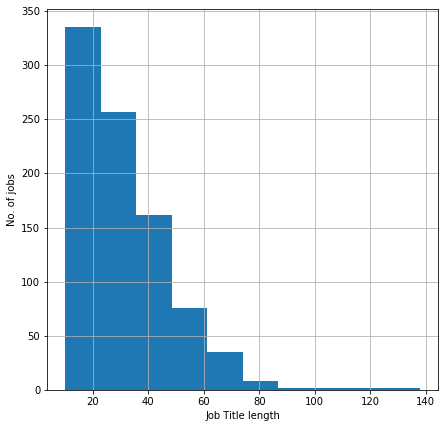

In [13]:
# visualizing title length

plt.figure(figsize=(7,7))
plt.xlabel("Job Title length")
plt.ylabel("No. of jobs")

job_title_df['Job Title'].str.len().hist()

### Job Title Length
Most Jobs have shorter titles, because most of the Job titles are generic. Few jobs have really long titles because the product or company name is added.

In [14]:
#Extracting Job Descriptions
desc_df = df['Job Description'].to_frame()
desc_df.sample(10, random_state=5)


,Job Description
852,For over 25 years we’ve been helping our commu...
207,"About the job\nIndividually we are people, but..."
627,Job Type: Permanent\nPrimary Location: Vancouv...
671,Our subsidiary is in PropTech and real estate ...
661,Who needs insurance? Everybody. That keeps us ...
489,"Avant le SRAS-CoV-2, un vaccin qui était dével..."
434,RESPONSIBILITIES:\nDevelop state-of-the-art co...
448,Qui sommes-nous :\nBusPatrouille est une entre...
634,"For 70 years, Charles River employees have wor..."
748,We're transforming the Cyber Security industry...


In [15]:
desc_df['Job Description'][455]

"About Fiix\nFiix is on a mission to build better maintenance teams by connecting customers to the tools, resources, and technology they need to join the future of maintenance. We help our customers drive better business outcomes with easy-to-use, AI-driven maintenance software, an open ecosystem, pre-built integrations and the industry expertise they need for maintenance success. There are over 2600 maintenance teams in 90+ countries using Fiix to improve communication, asset health, and even sustainability.\nCreating positive social impact is baked into our company DNA, and as one of Canada’s fastest-growing companies and Best Workplaces, we’re transforming an industry and doing it the right way.\n\nAbout the team\nOur Fiixers are the key to our success. Our team is made up of professionals who bring together a variety of experiences, backgrounds and perspectives. We celebrate the diversity of our people and place a high value on creating an environment where everyone can bring their

In [16]:
#clean titles by creating a new column with the french version?
#What differentiates jobs with intern or Manager or Research in the title?

Some Job descriptions were truncated, so I had to inspect my scraper. Apparently the glassdoor scraper was truncating some description because of list tags in some job descriptions. 

<AxesSubplot:xlabel='Job Description length', ylabel='No. of jobs'>

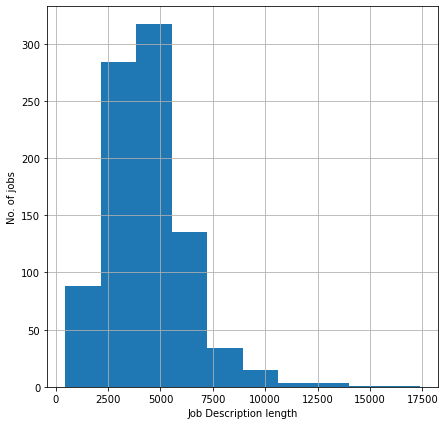

In [17]:
# visualizing title length

plt.figure(figsize=(7,7))
plt.xlabel("Job Description length")
plt.ylabel("No. of jobs")

desc_df['Job Description'].str.len().hist()

In [18]:
len(desc_df['Job Description'][:55])

55

In [19]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /Users/olohireme/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/olohireme/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [20]:
import contractions

In [21]:
desc_df['Job Description'] = desc_df['Job Description'].apply(lambda x: [contractions.fix(word) for word in x.split()])
desc_df.sample(10, random_state = 5)

,Job Description
852,"[For, over, 25, years, we have, been, helping,..."
207,"[About, the, job, Individually, we, are, peopl..."
627,"[Job, Type:, Permanent, Primary, Location:, Va..."
671,"[Our, subsidiary, is, in, PropTech, and, real,..."
661,"[Who, needs, insurance?, Everybody., That, kee..."
489,"[Avant, le, SRAS-CoV-2,, un, vaccin, qui, étai..."
434,"[RESPONSIBILITIES:, Develop, state-of-the-art,..."
448,"[Qui, sommes-nous, :, BusPatrouille, est, une,..."
634,"[For, 70, years,, Charles, River, employees, h..."
748,"[we are, transforming, the, Cyber, Security, i..."


In [22]:
#cocatenating items back into a single string
desc_df['Job Description'] = [' '.join(map(str, l)) for l in desc_df['Job Description']]
desc_df.sample(10, random_state = 5)

,Job Description
852,For over 25 years we have been helping our com...
207,"About the job Individually we are people, but ..."
627,Job Type: Permanent Primary Location: Vancouve...
671,Our subsidiary is in PropTech and real estate ...
661,Who needs insurance? Everybody. That keeps us ...
489,"Avant le SRAS-CoV-2, un vaccin qui était dével..."
434,RESPONSIBILITIES: Develop state-of-the-art com...
448,Qui sommes-nous : BusPatrouille est une entrep...
634,"For 70 years, Charles River employees have wor..."
748,we are transforming the Cyber Security industr...


In [23]:
#observe changes
desc_df['Job Description'][455]

"About Fiix Fiix is on a mission to build better maintenance teams by connecting customers to the tools, resources, and technology they need to join the future of maintenance. We help our customers drive better business outcomes with easy-to-use, AI-driven maintenance software, an open ecosystem, pre-built integrations and the industry expertise they need for maintenance success. There are over 2600 maintenance teams in 90+ countries using Fiix to improve communication, asset health, and even sustainability. Creating positive social impact is baked into our company DNA, and as one of Canada’s fastest-growing companies and Best Workplaces, we are transforming an industry and doing it the right way. About the team Our Fiixers are the key to our success. Our team is made up of professionals who bring together a variety of experiences, backgrounds and perspectives. We celebrate the diversity of our people and place a high value on creating an environment where everyone can bring their whol

### Contractions
Words like you'll and we're were converted to full forms e.g You will and We are. Possesives like Canada's were unaffected

### Noise Cleaning

In [24]:
import regex as re
desc_df['Job Description'] = desc_df['Job Description'].str.lower()
desc_df['Job Description'] = desc_df['Job Description'].apply(lambda x: re.sub(r'[^\w\d\s\']+', '', x))
desc_df.sample(10, random_state = 5)

,Job Description
852,for over 25 years we have been helping our com...
207,about the job individually we are people but t...
627,job type permanent primary location vancouver ...
671,our subsidiary is in proptech and real estate ...
661,who needs insurance everybody that keeps us bu...
489,avant le srascov2 un vaccin qui était développ...
434,responsibilities develop stateoftheart compute...
448,qui sommesnous buspatrouille est une entrepri...
634,for 70 years charles river employees have work...
748,we are transforming the cyber security industr...


In [25]:
#nltk tokenization
desc_df['tokenized_desc'] = desc_df['Job Description'].apply(word_tokenize)
desc_df.sample(10, random_state = 5)

,Job Description,tokenized_desc
852,for over 25 years we have been helping our com...,"[for, over, 25, years, we, have, been, helping..."
207,about the job individually we are people but t...,"[about, the, job, individually, we, are, peopl..."
627,job type permanent primary location vancouver ...,"[job, type, permanent, primary, location, vanc..."
671,our subsidiary is in proptech and real estate ...,"[our, subsidiary, is, in, proptech, and, real,..."
661,who needs insurance everybody that keeps us bu...,"[who, needs, insurance, everybody, that, keeps..."
489,avant le srascov2 un vaccin qui était développ...,"[avant, le, srascov2, un, vaccin, qui, était, ..."
434,responsibilities develop stateoftheart compute...,"[responsibilities, develop, stateoftheart, com..."
448,qui sommesnous buspatrouille est une entrepri...,"[qui, sommesnous, buspatrouille, est, une, ent..."
634,for 70 years charles river employees have work...,"[for, 70, years, charles, river, employees, ha..."
748,we are transforming the cyber security industr...,"[we, are, transforming, the, cyber, security, ..."


In [26]:
#Delete accidentally created columns
#desc_df = desc_df.drop(['content', 'tokenized_content'], axis=1)

In [27]:
# initializing Stop words libraries
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/olohireme/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


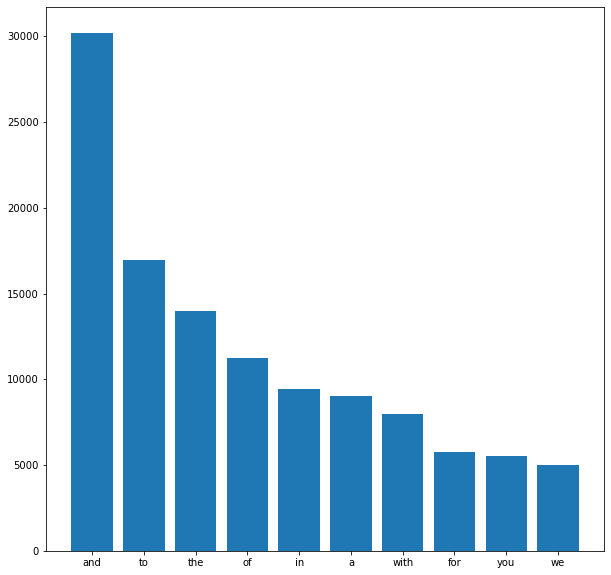

In [28]:
# Before removing checking occurances of stopwords in article content
def plot_top_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1
            
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10]
    x,y=zip(*top)
    plt.figure(figsize=(10,10))
    plt.bar(x,y)

plot_top_stopwords_barchart(desc_df['Job Description'])

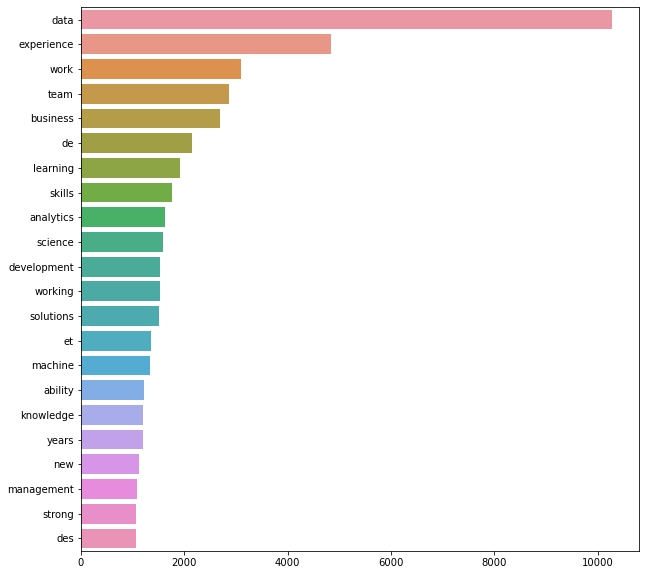

In [29]:
import seaborn as sns
from collections import  Counter

def plot_top_non_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:50]:
        if (word not in stop):
            x.append(word)
            y.append(count)
    plt.figure(figsize=(10,10))
    sns.barplot(x=y,y=x)

plot_top_non_stopwords_barchart(desc_df['Job Description'])

### Stopwords

'De', 'Et' and 'Des' are actually french stopwords. Remove French jobs from desc? 

In [30]:
#remove stopwords 

desc_df['tokenized_desc'] = desc_df['tokenized_desc'].apply(lambda x: [word for word in x if word not in stop_words])
desc_df['tokenized_desc_join'] = [' '.join(map(str, l)) for l in desc_df['tokenized_desc']]

desc_df.sample(10, random_state = 5)

,Job Description,tokenized_desc,tokenized_desc_join
852,for over 25 years we have been helping our com...,"[25, years, helping, community, essential, oil...",25 years helping community essential oil blend...
207,about the job individually we are people but t...,"[job, individually, people, together, aviva, i...",job individually people together aviva individ...
627,job type permanent primary location vancouver ...,"[job, type, permanent, primary, location, vanc...",job type permanent primary location vancouver ...
671,our subsidiary is in proptech and real estate ...,"[subsidiary, proptech, real, estate, analytics...",subsidiary proptech real estate analytics spac...
661,who needs insurance everybody that keeps us bu...,"[needs, insurance, everybody, keeps, us, busy,...",needs insurance everybody keeps us busy busy i...
489,avant le srascov2 un vaccin qui était développ...,"[avant, le, srascov2, un, vaccin, qui, était, ...",avant le srascov2 un vaccin qui était développ...
434,responsibilities develop stateoftheart compute...,"[responsibilities, develop, stateoftheart, com...",responsibilities develop stateoftheart compute...
448,qui sommesnous buspatrouille est une entrepri...,"[qui, sommesnous, buspatrouille, est, une, ent...",qui sommesnous buspatrouille est une entrepris...
634,for 70 years charles river employees have work...,"[70, years, charles, river, employees, worked,...",70 years charles river employees worked togeth...
748,we are transforming the cyber security industr...,"[transforming, cyber, security, industry, us, ...",transforming cyber security industry us f8th u...


In [31]:
# for sake of simplicity, showing 10 job desc based on the same seed value at 5
tagged_stanzas = []
tagged = []

for word in desc_df['tokenized_desc'].sample(10, random_state = 5):
    tagged_word = nltk.pos_tag(word)
    print(tagged_word)

    tagged_stanzas.append(tagged_word)

# This format is needed for below visualizer as in takes only two values. If you skip this format, it might give you - "too many values to unpack error" 
tagged.append(tagged_stanzas)


[('25', 'CD'), ('years', 'NNS'), ('helping', 'VBG'), ('community', 'NN'), ('essential', 'JJ'), ('oil', 'NN'), ('blends', 'NNS'), ('actually', 'RB'), ('work', 'VBP'), ('essential', 'JJ'), ('oil', 'NN'), ('blends', 'NNS'), ('treat', 'NN'), ('stress', 'NN'), ('pain', 'NN'), ('gut', 'NN'), ('balance', 'NN'), ('support', 'NN'), ('relaxation', 'NN'), ('prior', 'RB'), ('sleep', 'JJ'), ('symptoms', 'NNS'), ('coughs', 'VBP'), ('colds', 'NNS'), ('know', 'VBP'), ('life', 'NN'), ('committed', 'VBN'), ('wellness', 'RB'), ('greater', 'JJR'), ('one', 'CD'), ('focused', 'VBD'), ('illness', 'NN'), ('believe', 'VBP'), ('reaching', 'VBG'), ('natural', 'JJ'), ('enhance', 'NN'), ('longterm', 'JJ'), ('health', 'NN'), ('wellness', 'NN'), ('every', 'DT'), ('day', 'NN'), ('ranked', 'VBD'), ('canadian', 'JJ'), ('business', 'NN'), ('profit', 'NN'), ('one', 'CD'), ('canadas', 'NN'), ('fastest', 'JJS'), ('growing', 'VBG'), ('companies', 'NNS'), ('support', 'VBP'), ('us', 'PRP'), ('journey', 'NN'), ('seeking', 'VBG

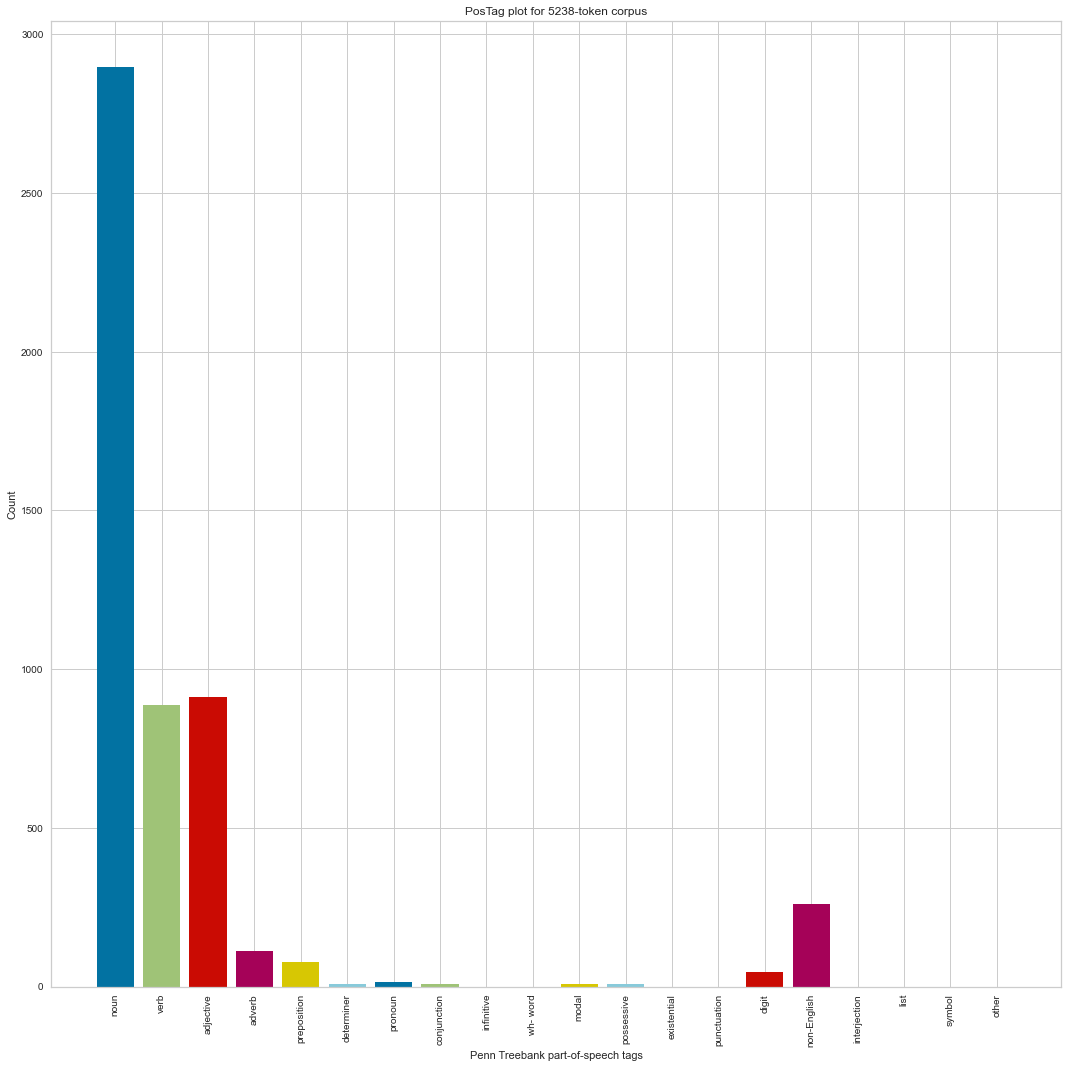

<AxesSubplot:title={'center':'PosTag plot for 5238-token corpus'}, xlabel='Penn Treebank part-of-speech tags', ylabel='Count'>

In [32]:
# Create the visualizer
from yellowbrick.text import PosTagVisualizer
plt.figure(figsize=(15,15))
viz = PosTagVisualizer()
viz.fit(tagged)
viz.show()

In [33]:
#NER & Ngrams from WWWC 2
#TDf/idf  and everything else in WWWC3
#git ignore file

In [34]:
import en_core_web_sm
nlp = en_core_web_sm.load()

In [35]:
import spacy
from spacy import displacy

for sentence in desc_df['Job Description'].sample(5, random_state = 10):
    sentence_doc = nlp(sentence[:60])
  
    displacy.render(sentence_doc, style='dep', jupyter=True)
    print("Sentence is: ", sentence_doc)

Sentence is:  summary onix solution architect helps customers transform an


Sentence is:  machine learning engineer cyber security calgary los altos c


Sentence is:  as a critical member of the stream systems team the data sci


Sentence is:  who we are ciscos customer experience cx organization is one


Sentence is:  introduction have you heard about the ibm garage it is a cro


### Named Entity Recognition

In [36]:
for sentence in desc_df['Job Description'].sample(25, random_state = 15):
    doc=nlp(sentence)
    [print((x.text,x.label_)) for x in doc.ents]
    print('\n')

('clearco', 'ORG')
('advanced analytics', 'ORG')
('clearco', 'PERSON')
('june 22 2021', 'DATE')
('daytoday', 'DATE')
('4 years', 'DATE')
('statistician', 'NORP')
('kubernetesdocker', 'PERSON')


('paraza pharma inc', 'ORG')
('merck pfizer', 'ORG')
('vitro dmpk', 'PERSON')
('3 to 5 years', 'DATE')
('3 to 5 years', 'DATE')
('caco2 mdck', 'QUANTITY')
('20210601', 'DATE')
('20210601', 'DATE')
('assurance invalidité', 'ORG')
('maladie complémentaire assurance vie assurance vision congés de vacances', 'ORG')
("d'aide aux employés", 'PERSON')
("d'achat", 'CARDINAL')
("d'actions", 'ORG')
('sur', 'CARDINAL')
('8', 'CARDINAL')
('quart de jour', 'PERSON')


('data analytics', 'ORG')
('digital', 'ORG')
('multiple data', 'ORG')
('etl', 'ORG')
('olap', 'ORG')
('php nodejs vuejs react', 'ORG')
('hybris java python', 'ORG')
('kafka', 'PERSON')
('aws gcp', 'PERSON')
('25 years', 'DATE')
('56 years', 'DATE')
('metadata', 'GPE')
('python hadoop', 'ORG')
('kafka', 'PERSON')
('french', 'LANGUAGE')
('englis

### NER Fails
Not all Entities are named, perhaps because everything has been converted to lower case


### N-grams

In [37]:
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer

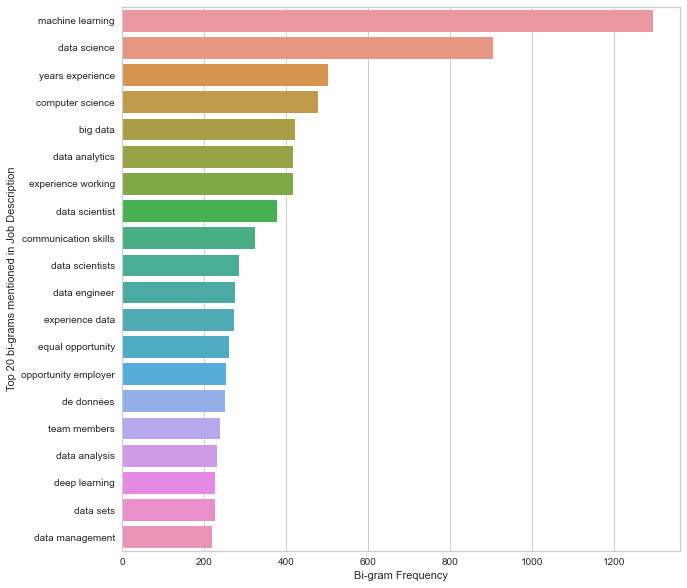

In [38]:

#Bi-grams 

def plot_top_ngrams_barchart(text, n=2):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:20]

    top_n_bigrams=_get_top_ngram(text,n)[:20]
    x,y=map(list,zip(*top_n_bigrams))
    plt.figure(figsize=(10,10))
    plt.xlabel("Bi-gram Frequency")
    plt.ylabel("Top 20 bi-grams mentioned in Job Description")
    sns.barplot(x=y,y=x)


plot_top_ngrams_barchart(desc_df['tokenized_desc_join'],2)

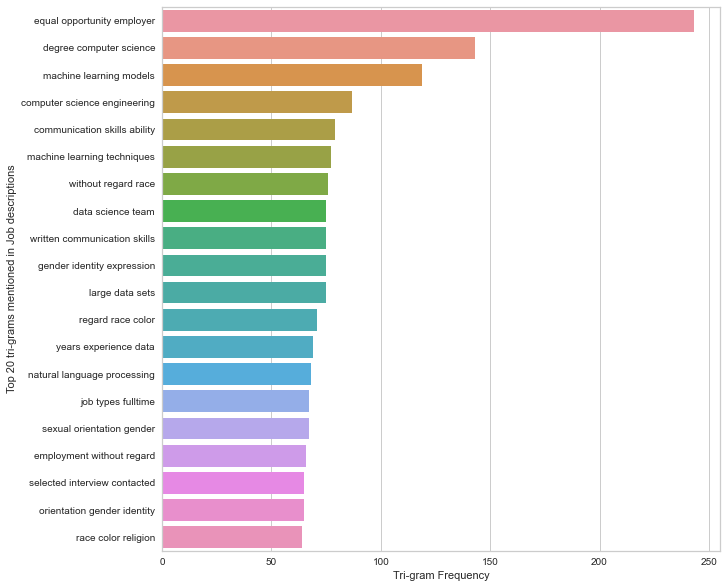

In [39]:
#Tri-grams 

def plot_top_ngrams_barchart(text, n=3):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:20]

    top_n_bigrams=_get_top_ngram(text,n)[:20]
    x,y=map(list,zip(*top_n_bigrams))
    plt.figure(figsize=(10,10))
    plt.xlabel("Tri-gram Frequency")
    plt.ylabel("Top 20 tri-grams mentioned in Job descriptions")
    sns.barplot(x=y,y=x)


plot_top_ngrams_barchart(desc_df['tokenized_desc_join'],3)

In [40]:
#To extract skills 
#IDEA 1 
#Edward Ross's 3 part series
#https://skeptric.com/extract-skills-1-noun-phrase/
#https://skeptric.com/notebooks/Parsing%20Experience%20from%20Adzuna%20Job%20Ads.html
#IDEA 2, after WWWC
#use a pretrained or word2Vec model that you trained on the corpus to get a list of technical skills close to a list 
#you could get from the internet. For each datapoint you could have a column of the most similar skills
#Cluster unigrams and bigrams until you get a technical skills cluster
#Some ideas
#https://datascience.stackexchange.com/questions/30057/to-extract-the-skills-required-for-the-job-given-the-job-description/30066

Refereneces: Intro to NLP by WomenWhoCode - 